## **Exemplo de uso de IA Generativa com modelos Transformers**

Um modelo grande de linguagem (LLM: Large Language Model) é um modelo de inteligência artificial que pode reconhecer e gerar texto, entre outras tarefas. Os LLMs são treinados em enormes conjuntos de dados.

## **Transformers**

Um modelo transformer é uma rede neural que aprende o contexto e, assim, o significado com base no monitoramento de relações em dados sequenciais. Essa arquitetura inovadora ampliou sua aplicação após o artigo "Attention Is All You Need", de 2017.

Disponível em: https://arxiv.org/abs/1706.03762


**Hugging Face**

O Hugging Face Hub é uma plataforma com mais de 900 mil modelos, 200 mil conjuntos de dados e 300 mil demos em que as pessoas podem colaborar facilmente em seus fluxos de trabalho de ML. O Hub funciona como um lugar central onde qualquer um pode compartilhar, explorar, descobrir e experimentar o Machine Learning de código aberto.

https://huggingface.co/





In [ ]:
# Instalação das bibliotecas necesárias para testar modelos do hugging face
!pip install huggingface_hub
!pip install transformers

In [ ]:
# Importando as bibliotecas e pacotes
import huggingface_hub

import torch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Criando as variáveis para verificação do hardware disponível.
# Para melhor desempenho, recomenda-se trabalhar com GPU.
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

O objeto mais básico na biblioteca Transformers é a função **pipeline**() .

Ela conecta o modelo com seus parâmetros básicos necessários de pré e pós-processamento, permitindo-nos inserir textos e obter uma resposta inteligível.

In [ ]:
from transformers import pipeline

## **Exemplos**

- **Classificação de textos** (text-classification)
- Análise de sentimentos

In [ ]:
task = 'text-classification'
model ='SamLowe/roberta-base-go_emotions' # Pesquise o modelo no Hugging Face

In [ ]:
classifier = pipeline(task=task,
                      model=model,
                      top_k=5, # Ranking
                      device=device,
                      torch_dtype=torch_dtype)

In [ ]:
sentences = ['I wanna know have you ever seen the rain'] # Insira aqui a(s) sentença(s) a ser(em) classificada(s)
model_outputs = classifier(sentences)
model_outputs

**Zero-Shot Classification**

É a tarefa de prever uma classe que não foi vista pelo modelo durante o treinamento.

In [ ]:
task = 'zero-shot-classification'
model = 'valhalla/distilbart-mnli-12-1' # Pesquise o modelo no Hugging Face

In [ ]:
# sequence_to_classify = "one day I will see the world"
# candidate_labels = ['travel', 'cooking', 'dancing']
# classifier(sequence_to_classify, candidate_labels)
#{'labels': ['travel', 'dancing', 'cooking'],
# 'scores': [0.9938651323318481, 0.0032737774308770895, 0.002861034357920289],
# 'sequence': 'one day I will see the world'}

In [ ]:
classifier_zero_shot = pipeline(task=task,
                      model=model,
                      device=device,
                      torch_dtype=torch_dtype)

In [ ]:
sentence_to_classify = 'The greatest gift is the ability to forget the bad things and focus on the good.'
candidate_labels = ['education', 'politics', 'business']

In [ ]:
classifier_zero_shot(candidate_labels, sentence_to_classify)

**Geração de textos** (text-generation)

In [ ]:
task = 'text-generation'
model = 'openai-community/gpt2' # Pesquise o modelo no Hugging Face

In [ ]:
generator = pipeline(task,
                     model=model,
                     device=device,
                     torch_dtype=torch_dtype
                     )

In [ ]:
# max_lenght (limite de tamanho de cada sentença gerada)
# num_return_sequences (número de sentenças geradas)
# Frase de exemplo:
generator('The meaning of life is', max_length=25, num_return_sequences=8)

**Perguntas e respostas** (task: question-answering)


In [ ]:
task = 'question-answering'
model = 'distilbert/distilbert-base-cased-distilled-squad'

In [ ]:
question_answerer = pipeline(task = task,
                             model = model,
                             device=device,
                             torch_dtype=torch_dtype
                             )

In [ ]:
question_answerer(
    question=input("Insira a pergunta: "),
    context="Brasília é a capital do Brasil",
)

**Sumarização** (task: summarization)

In [ ]:
task = 'summarization'
model = 'facebook/bart-large-cnn'

In [ ]:
summarizer = pipeline(task=task,
                      model=model,
                      min_length=10,
                      max_length=30,
                      device=device,
                      torch_dtype=torch_dtype
                      )

In [ ]:
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

**Tradução** (task: translation)

In [ ]:
task = 'translation'
model = 'Helsinki-NLP/opus-mt-de-en'

In [ ]:
translator = pipeline(task=task,
                      model=model,
                      device=device,
                      torch_dtype=torch_dtype)

In [ ]:
translator(
    '''
    Der Weg des rechtschaffenen Menschen ist von allen Seiten von den Ungerechtigkeiten der Egoisten
    und der Tyrannei der Bösen gesäumt.
    Gesegnet sei derjenige, der im Namen der Nächstenliebe und des guten Willens die Schwachen
    durch das Tal der Dunkelheit führt.
    Denn er ist wahrhaftig der Beschützer seines Bruders und der Finder verlorener Kinder.
    '''
    )

**Introdução ao Lang Chain**

O LangChain é uma estrutura de código aberto para criar aplicações baseadas em grandes modelos de linguagem (LLMs). Os LLMs são grandes modelos de aprendizado profundo pré-treinados em grandes quantidades de dados que podem gerar respostas às consultas do usuário, por exemplo, responder perguntas ou criar imagens a partir de prompts baseados em texto. O LangChain fornece ferramentas e abstrações para melhorar a personalização, a precisão e a relevância das informações que os modelos geram.

Fonte:
https://aws.amazon.com/pt/what-is/langchain/

Documentação:
https://www.langchain.com/

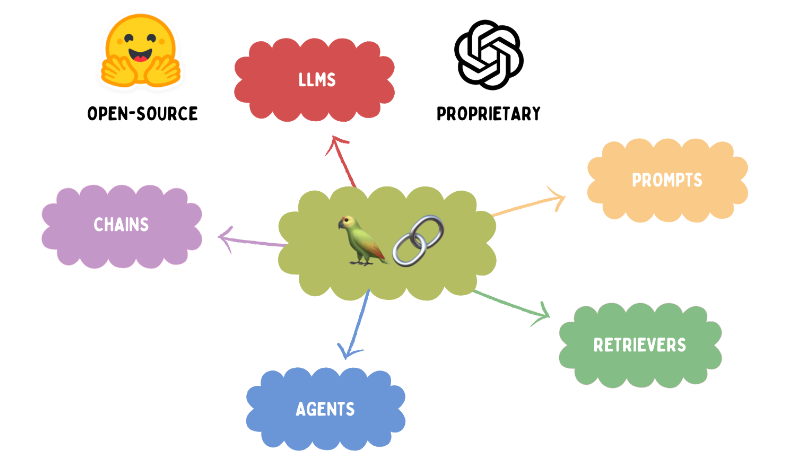

In [ ]:
!pip install langchain_huggingface

In [ ]:
# Testando a API do Hugging Face
from langchain_huggingface import HuggingFaceEndpoint

In [ ]:
# API token gerado no Hugging Face
huggingfacehub_api_token = ''

In [ ]:
# Escolhendo o modelo
llm_hface = HuggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct',
                          huggingfacehub_api_token=huggingfacehub_api_token)

In [ ]:
# Fazendo a previsão das palavras baseadas na frase abaixo:
question = 'How can I retain learning?'
output = llm_hface.invoke(question)
print(output)

**OPCIONAL**

Testando a API da Open AI


In [ ]:
!pip install langchain_openai

In [ ]:
from langchain_openai import OpenAI

In [ ]:
llm_openAI = OpenAI(model="gpt-3.5-turbo-instruct",
                    api_key='')

In [ ]:
question = 'Are you entertained?'
output = llm_openAI.invoke(question)
print(output)

Um Prompt Template do Lang Chain permite adicionar contextos, exemplos e instruções ao modelo.

In [ ]:
!pip install langchain

In [ ]:
from langchain import PromptTemplate

In [ ]:
template = "You are an artificial intelligence assistant, answer the question. {question}"
# Criando o prompt template
prompt = PromptTemplate(template=template,
                        input_variables=['question'])

In [ ]:
# Utilizando o modelo LLM
llm = HuggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct',
                          huggingfacehub_api_token=huggingfacehub_api_token)

In [ ]:
# Criando a integração do LLM com o prompt template
llm_chain = prompt | llm

In [ ]:
question = 'Can you tell us a joke:'
output = llm_chain.invoke({'question': question})
print(output)

In [ ]:
!pip install langchain

In [ ]:
!pip install langchain_community

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

In [ ]:
# Define an OpenAI chat model
llm = ChatOpenAI(model="gpt-4o-mini",
                 temperature=0,
                 api_key='')

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "Respond to question: {question}")
    ]
)

# Chain the prompt template and model, and invoke the chain
llm_chain = prompt_template | llm
response = llm_chain.invoke({"question": "How can I retain learning?"})
print(response.content)

In [ ]:
!pip install google-generativeai

In [ ]:
import google.generativeai as genai

In [ ]:
genai.configure(api_key='')

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
response = model.generate_content('INSIRA AQUI A SUA PERGUNTA')

In [ ]:
print(response.text)

## **Document loaders**

In [ ]:
!pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI

In [ ]:
loader = PyPDFLoader('INSIRA AQUI O SEU ARQUIVO PDF')
documents = loader.load()

## Exemplo com chroma db

https://docs.trychroma.com/getting-started

O Chroma é um banco de dados vetorial de código aberto que está rapidamente se tornando uma escolha popular para desenvolvedores que trabalham com aplicações de IA, especialmente aquelas que envolvem grandes modelos de linguagem (LLMs). Ele é projetado para facilitar o armazenamento, gerenciamento e recuperação de embeddings, que são representações matemáticas de dados, como texto ou imagens.





In [ ]:
# Instalando o chromadb
!pip install chromadb

In [ ]:
# Dividir os documentos em pedaços (chunks)
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)

In [ ]:
# Criar embeddings (vetores a partir dos textos convertidos)
embeddings = OpenAIEmbeddings(api_key='')
db = Chroma.from_documents(texts, embeddings)

In [ ]:
# Criar o Chain
llm = OpenAI(api_key='')
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=db.as_retriever())

In [ ]:
query = "Qual é o tema principal do documento?"
answer = qa.invoke(query)
print(answer)